In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")


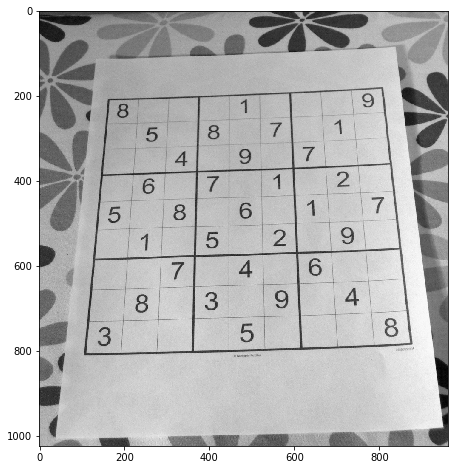

In [6]:
# img = cv2.imread("../DATA/sudoku.jpg") #Read in BGR order
def read_img():
    img = cv2.imread("../DATA/sudoku.jpg",cv2.IMREAD_GRAYSCALE) #could also use 0 instead on imread_grayscale
    return img;

display_img(read_img())

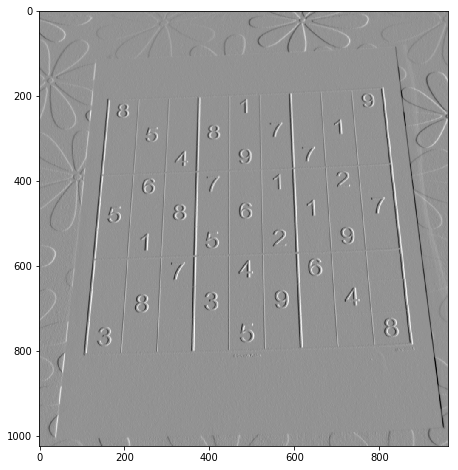

In [15]:
img = read_img()
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
display_img(sobelx)

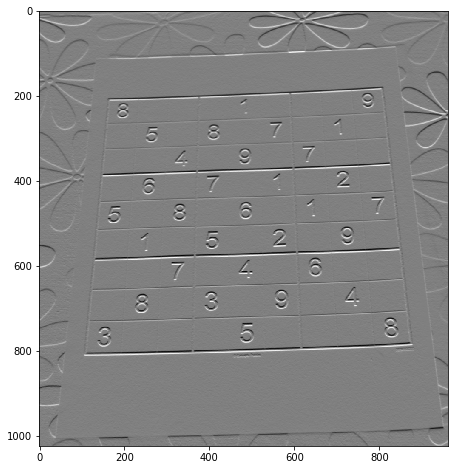

In [16]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
display_img(sobely)

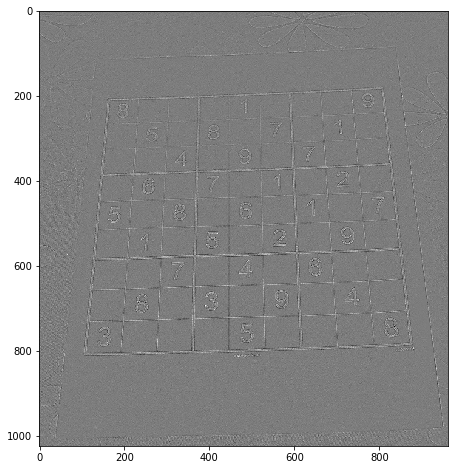

In [19]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
# laplacian = cv2.Laplacian(laplacian,cv2.CV_64F)
display_img(laplacian)

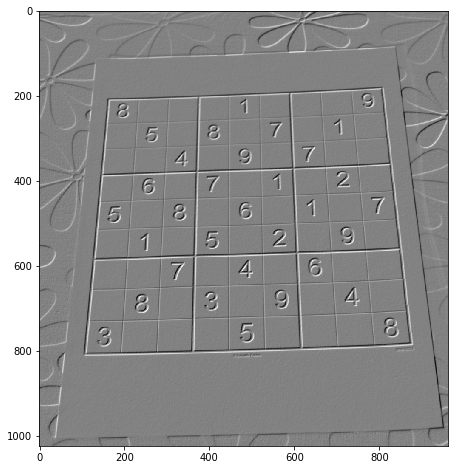

In [20]:
# Combinig sobel X and Y
sobelxy = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
display_img(sobelxy)

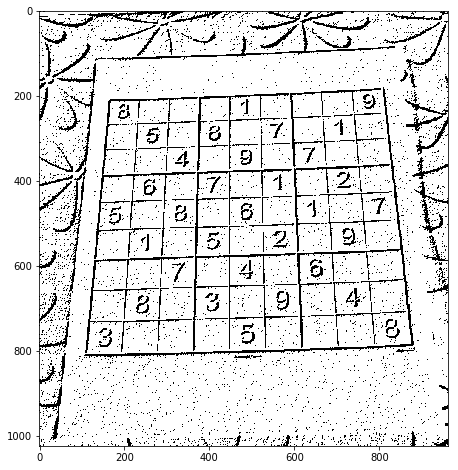

In [22]:
ret,thrs = cv2.threshold(sobelxy,150,255,cv2.THRESH_BINARY_INV)
display_img(thrs)

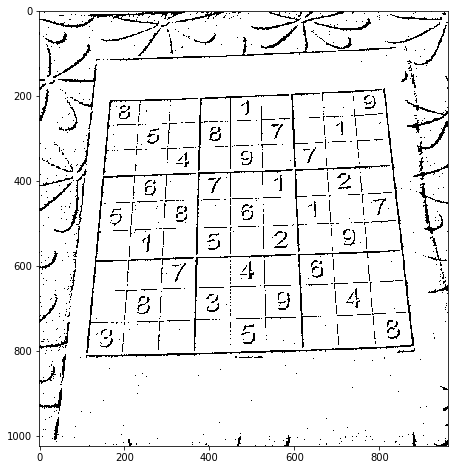

In [30]:
kernel = np.ones((2,2))
morphed = cv2.morphologyEx(thrs,cv2.MORPH_OPEN,kernel)
dilated = cv2.dilate(morphed,kernel,iterations=1)
# display_img(morphed)
display_img(dilated)